# GDP per Capita Time Series Analysis

In [1]:
# Importing libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

/Users/miguel/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
path = r'/Users/miguel/Desktop/CareerFoundry Bootcamp/Data Immersion/A6 Life Expectancy Project'

In [3]:
# Importing data

df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'gdp_per_capita.csv'), index_col = False)

In [4]:
df.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


In [5]:
df.shape

(266, 64)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
print(df.dtypes)

Country Name     object
Code             object
1960            float64
1961            float64
1962            float64
                 ...   
2017            float64
2018            float64
2019            float64
2020            float64
Unnamed: 65     float64
Length: 64, dtype: object


### Wrangling and cleaning

In [8]:
# Cleaning df

df = pd.melt(frame = df, id_vars=['Country Name', 'Code'], var_name= 'year', value_name='gdp_per_capita')

#The result

df = df.query('year != "Unnamed: 65"')

In [9]:
# Converting year from GDP to INT

df['year'] = df['year'].astype(int)
df.head()

,Country Name,Code,year,gdp_per_capita
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,147.612227
2,Afghanistan,AFG,1960,59.773234
3,Africa Western and Central,AFW,1960,107.932233
4,Angola,AGO,1960,NaN


In [10]:
# Dropping NaN values from the entire DataFrame
df = df.dropna()

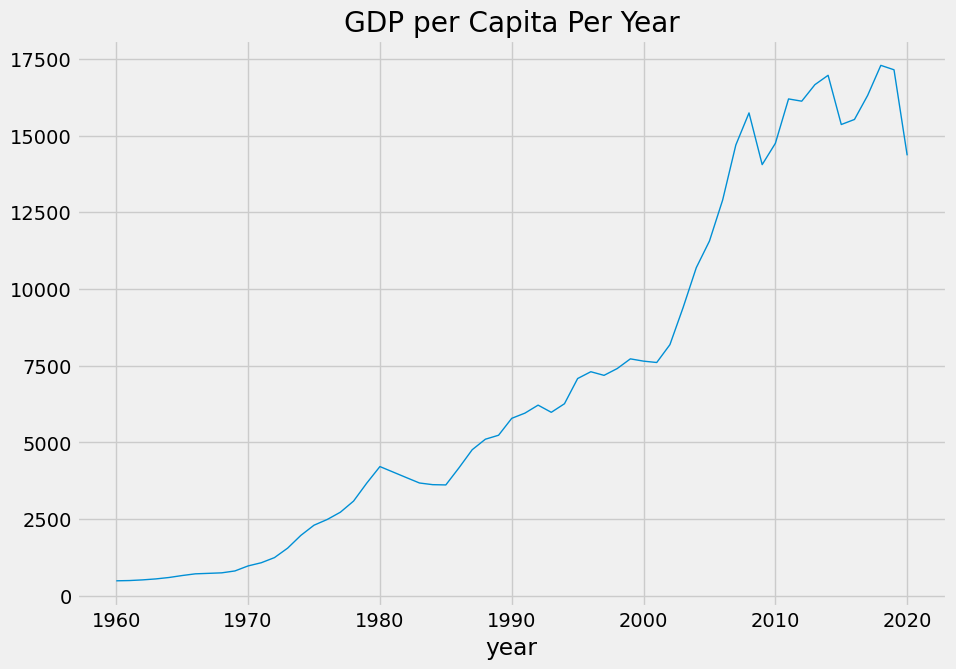

In [11]:
# Plotting the data using matplotlib

ax = df.groupby('year')['gdp_per_capita'].mean().plot(figsize = (10,7),\
                 title='GDP per Capita Per Year',\
                lw=1)
plt.legend().remove()
plt.savefig('gdp_1960_2020.png')
plt.show()

In [12]:
# Creating new df with data from the year 2000 and after
df_gdp = df[(df['year'] >= 2000)]

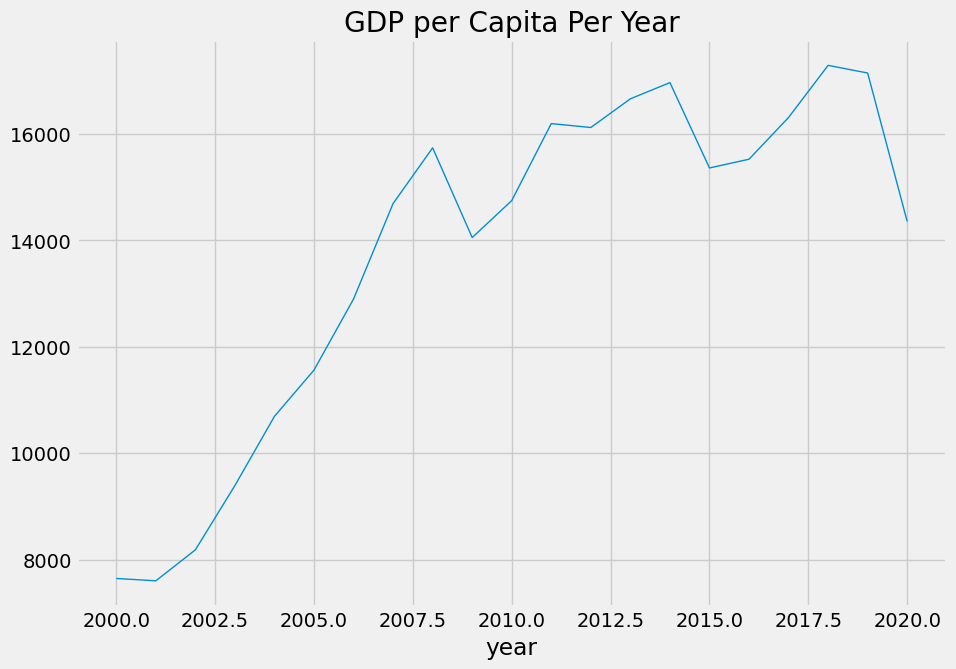

In [13]:
# Plotting the new data using matplotlib

ax = df_gdp.groupby('year')['gdp_per_capita'].mean().plot(figsize = (10,7),\
                 title='GDP per Capita Per Year',\
                lw=1)
plt.legend().remove()
plt.savefig('gdp_2000_2020.png')
plt.show()

### Time series analysis: decomposition

In [14]:
# Dropping non-numerical columns
df_gdp.drop(['Country Name', 'Code'], axis=1, inplace=True)

In [15]:
# Creating new df with gdp per capita averages by year

df_avg_gdp = df_gdp.groupby('year')['gdp_per_capita'].mean().reset_index()

In [16]:
df_avg_gdp.head()

,year,gdp_per_capita
0,2000,7644.790352
1,2001,7600.427986
2,2002,8182.405226
3,2003,9391.598104
4,2004,10691.920869


In [17]:
# Converting 'year' column to datetime format
df_avg_gdp['year'] = df_avg_gdp['year'].astype(str).astype('datetime64[ns]')

# Setting 'year' as the index
df_avg_gdp.set_index('year', inplace=True)

In [18]:
# Performing seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df_avg_gdp['gdp_per_capita'], model='additive')

In [19]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

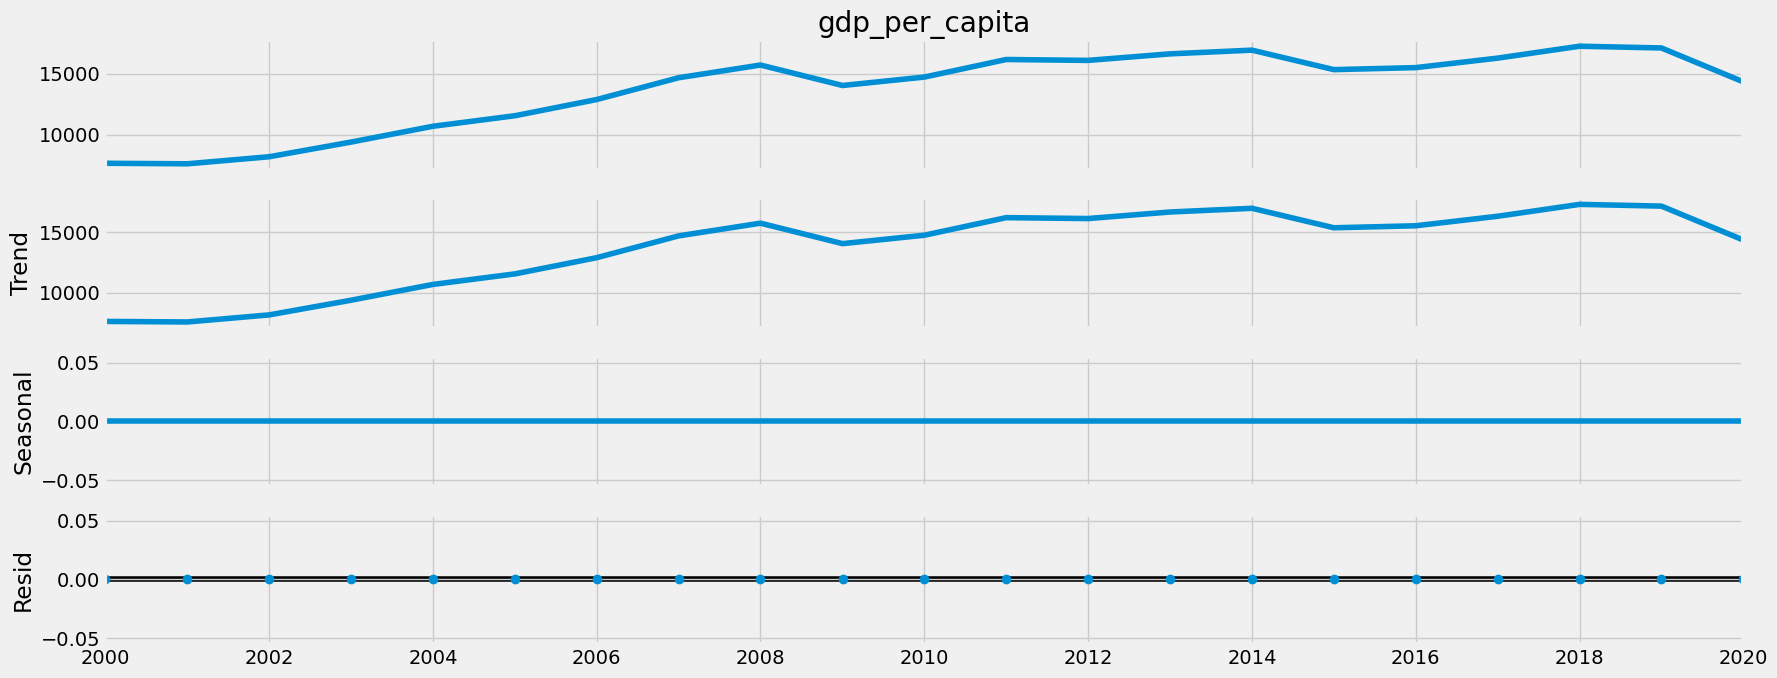

In [20]:
# Plotting the separate components

decomposition.plot()
plt.savefig('gdp_decomposition.png')
plt.show()

##### Analyze the results:

There is a general upward trend for the data with a slight decline in 2019/2020, which might be related to the COVID-19 pandemic and subsequent economic struggles. There is no seasonality or noise because the data is divided into years and the increase (and slight decrease at the end) are fairly smooth throughout the 20 years.

### Testing for stationarity

In [21]:
# Importing the adfuller() function and running dickey_fuller test

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries):
    # Performing the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Applying the test using the function on the time series
dickey_fuller(df_avg_gdp['gdp_per_capita'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.570775
p-value                         0.498256
Number of Lags Used             8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


##### Analyze the results:

Our general belief was that average GDP per capita would increase every year. We can't reject the null hypothesis because the Critical Value (5%) is smaller than the Test Statistic, which means that the data is unstationary. The results are not significant because the p-value is greater than 0.05 (p-value = 0.498256).

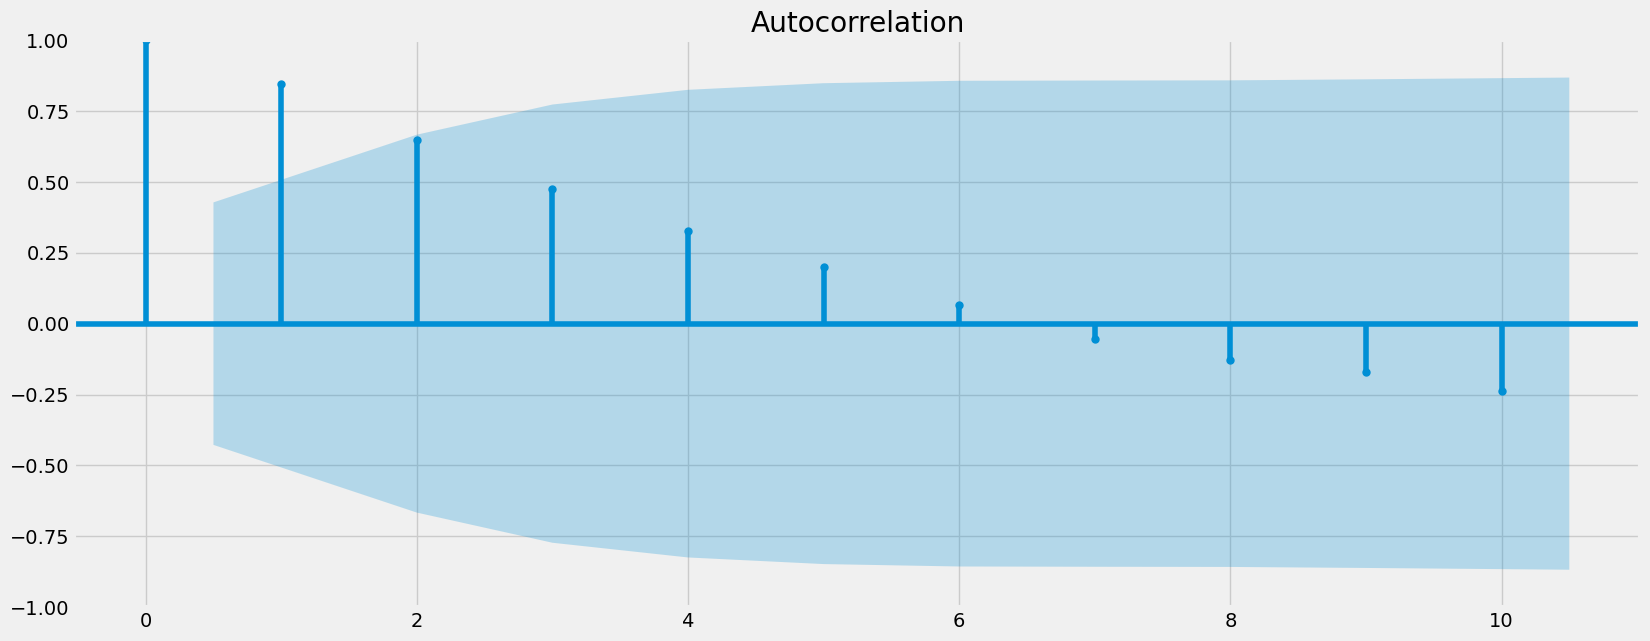

In [22]:
# Plotting autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_avg_gdp)
plt.savefig('gdp_autocorrelation.png')
plt.show()

### Stationarizing the data

In [23]:
# The df_avg_gdp.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

data_diff = df_avg_gdp - df_avg_gdp.shift(1)

In [24]:
# Removing the missing values that came about as a result of the differencing

data_diff.dropna(inplace = True)

In [25]:
# Checking work

data_diff.head()

,gdp_per_capita
year,
2001-01-01,-44.362366
2002-01-01,581.977240
2003-01-01,1209.192878
2004-01-01,1300.322765
2005-01-01,869.662846


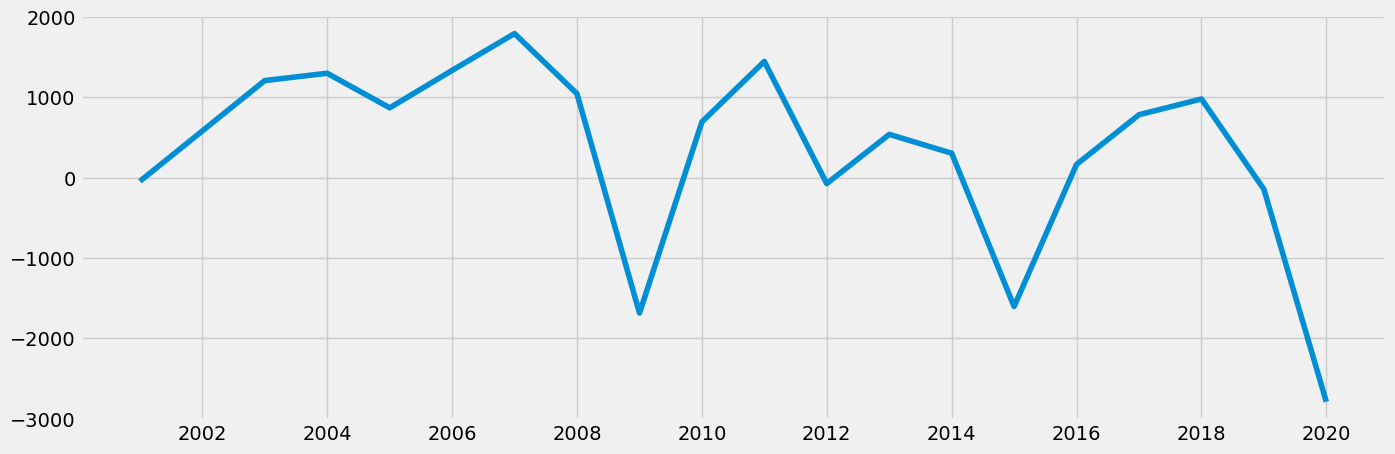

In [26]:
# Checking what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [27]:
# Running dickey fuller test on data_diff

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.652473
p-value                         0.455751
Number of Lags Used             8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


##### Interpreting the results after stationarizing data:

Our general belief was that average GDP per capita would increase every year. We can't reject the null hypothesis because the Critical Value (5%) is smaller than the Test Statistic, which means that the data is unstationary. The results are not significant because the p-value is greater than 0.05 (p-value = 0.455751).

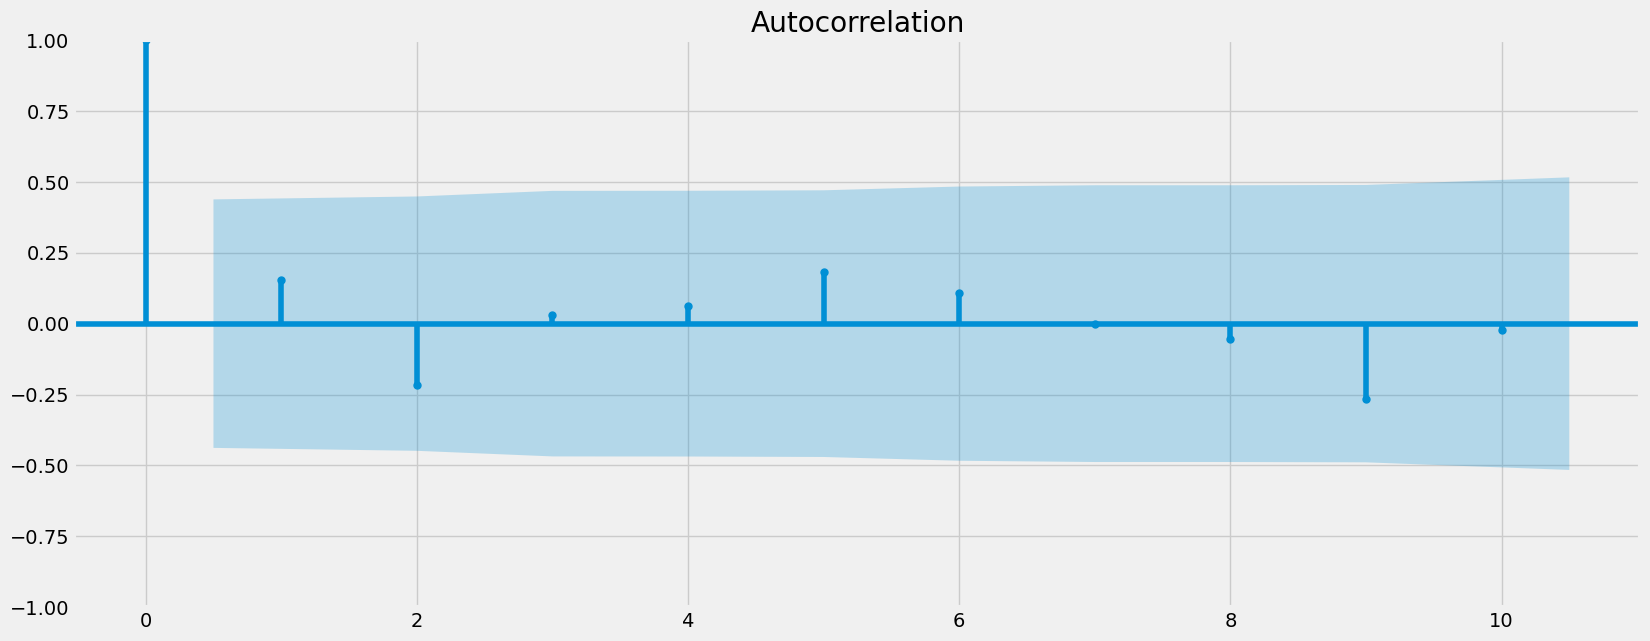

In [28]:
plot_acf(data_diff)
plt.savefig('gdp_stationary_autocorr.png')
plt.show()

### Stationarizing the data again

In [29]:
# The df_diff.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

data_diff2 = data_diff - data_diff.shift(1)

In [30]:
# Removing the missing values that came about as a result of the differencing

data_diff2.dropna(inplace = True)

In [31]:
# Checking work

data_diff.head()

,gdp_per_capita
year,
2001-01-01,-44.362366
2002-01-01,581.977240
2003-01-01,1209.192878
2004-01-01,1300.322765
2005-01-01,869.662846


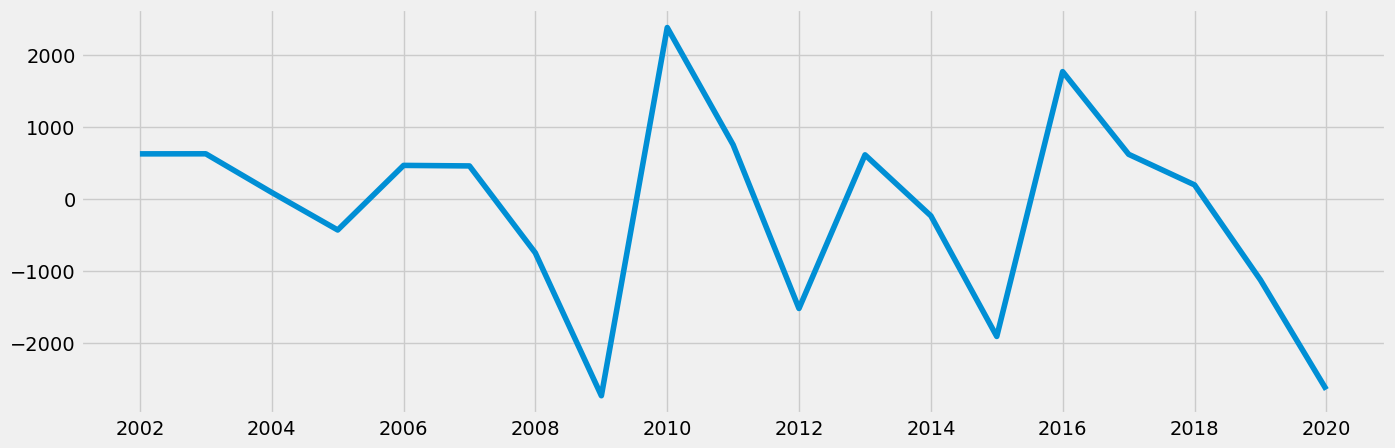

In [32]:
# Checking what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [33]:
# Running dickey fuller test on data_diff2

dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                 -0.596498
p-value                         0.871771
Number of Lags Used             7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


##### Interpreting the results after stationarizing data:

Our general belief was that average GDP per capita would increase every year. We can't reject the null hypothesis because the Critical Value (5%) is smaller than the Test Statistic, which means that the data is still unstationary. The results are not significant because the p-value is greater than 0.05 (p-value = 0.871771).

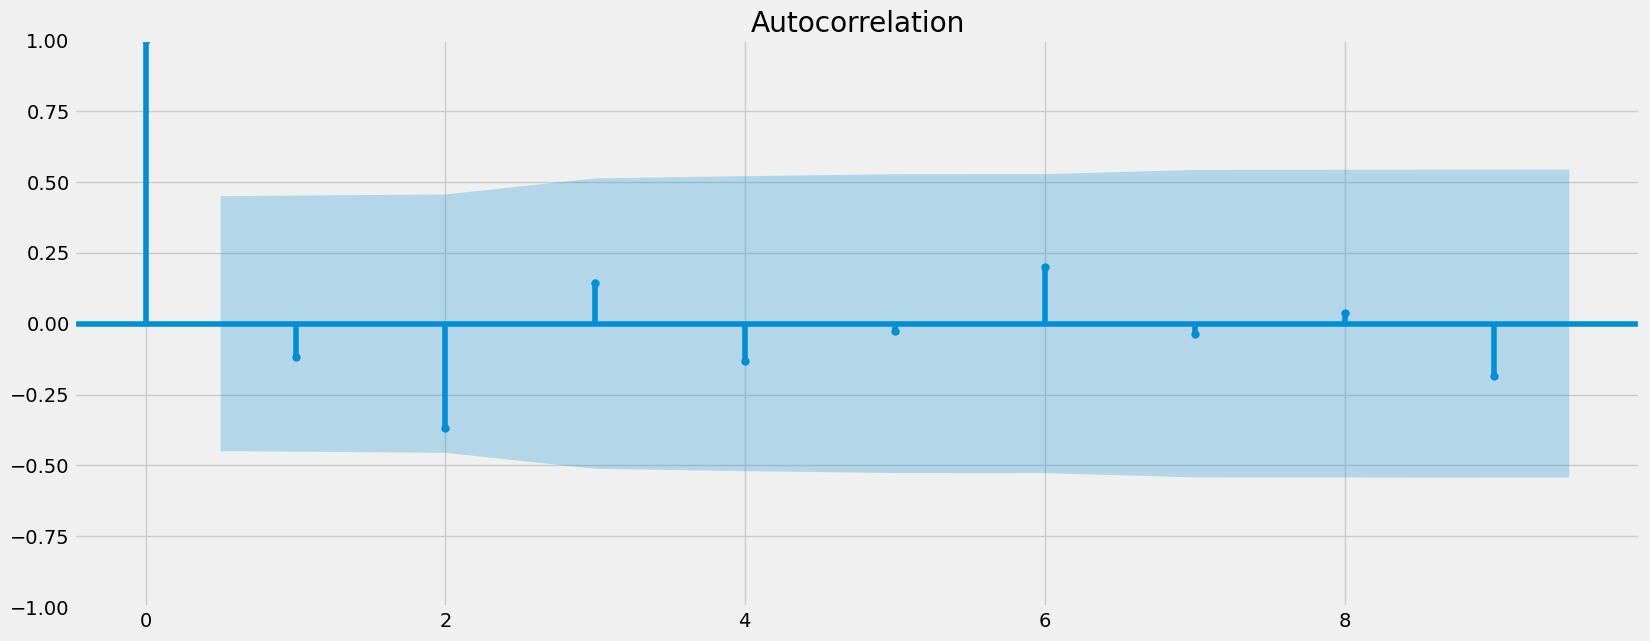

In [34]:
plot_acf(data_diff2)
plt.savefig('gdp_stationary_autocorr2.png')
plt.show()